# Regression Exercise
Using Regression to predict wine quality.

## Import Our Libraries

In [2]:
# Numpy for array manipulation
import numpy as np
# PANDAS IS FOR DATA WRANGLING
import pandas as pd
# SEABORN IS A PLOTTING LIBRARY
import seaborn as sns

# MATPLOT LIB IS ALSO A PLOTTING LIBRARY
import matplotlib.pyplot as plt

# IMPORT OUR LINEAR REGRESSION MODEL
from sklearn.linear_model import LinearRegression

# IMPORT OUR RANDOM FOREST REGERSSOR MODEL
from sklearn.ensemble import RandomForestRegressor


# IM LEAVING THERES HERE BECAUSE IM NICE
# METRICS HELP US SCORE OUR MODEL
from sklearn import metrics

# HELP US SPLIT OUR DATA INTO TESTING A TRAINING
from sklearn.model_selection import train_test_split

# HELPER FUNCTION WITH Z-SCORES TO REMOVE OUTLIERS
import scipy.stats as stats

%matplotlib inline

# Remember our main steps motto _isbe_.
1. i - Inspect and explore data.
2. s - Select and engineer features.
3. b - Build and train model.
4. e - Evaluate model.

# STEP 1 (i): Inspect and explore data
1. Use `data/winequality-white.csv`

In [3]:
# READ IN THE DATA USING PANDAS 
df = pd.read_csv('data/winequality-white.csv')
df.head()
# DISPLAY THE FIRST 5 ROWS

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,6


# Inspect our data using `df.describe()` function.

In [4]:
# Inspect our data using `df.describe()` function.
df.describe() # descriptive statistics

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
count,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000,4893.000000
mean,6.854210,0.278221,0.334139,6.393736,0.045791,35.310035,138.383507,3.188144,0.489871,10.512565,5.874719
std,0.843637,0.100831,0.121048,5.072990,0.021850,17.011384,42.509982,0.151011,0.114151,1.229755,0.880446
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,3.820000,1.080000,14.200000,8.000000


# Check for Nulls.

In [5]:
# Check for Nulls.
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Check for Duplicates

In [6]:
# Check for Duplicates
df.duplicated().sum()

937

In [7]:
# Remove duplicates
print(df.shape)
df = df.drop_duplicates()

# Sanity check
print(df.shape)

(4893, 11)
(3956, 11)


# Visualize our data to discover outliers.
* Use `sns.pairplot`

In [8]:
# Visualize our data to discover outliers.
# sns.pairplot(df)

___
# STEP 2  (s):  Select and Engineer Features

# Remove outliers
* Make sure you DO NOT remove outliers from our target variable of `quality`.

In [9]:
target_cols = df.columns.tolist()
target_cols.remove('quality') # column:quality is the target variable
target_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'pH',
 'sulphates',
 'alcohol']

In [10]:
# Number of outliers in each feature (/column/explanatory_variable/X)
# Using zscore and a threshold of 3 for determining outliers

n_outlier = []
for i in target_cols:
    n_outlier.append(np.where(stats.zscore(df[i])>3, 1,0).sum())
    
pd.Series(n_outlier , target_cols).sort_values(ascending = False)

chlorides               89
citric acid             70
volatile acidity        69
sulphates               38
fixed acidity           29
pH                      28
free sulfur dioxide     24
total sulfur dioxide    10
residual sugar           9
alcohol                  0
dtype: int64

In [11]:
# we can remove the column:alochol from list:target_variable because it has no outliers
target_cols.remove('alcohol')
target_cols # Sanity check

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'pH',
 'sulphates']

In [12]:
# Keep this for later
original_cols = df.columns

# Set the columns you want to remove outliers for
target_cols = target_cols

# Make a new list that is going to contain our z-score
z_score_cols = []

# Loop through our target columns
for col in target_cols:
    # Make the new column name the same as the original but with 'z_score' added to it
    new_col_name = col + 'z_score'
    
    # Set the new column equal to the score
    df[new_col_name] = stats.zscore(df[col])
    
    # Set the z-score to its absolute value of the for easier filtering
    df[new_col_name] = abs(df[new_col_name])
    
    # Append the new column name our our z_score_cols list for easier access for later.
    z_score_cols.append(new_col_name)

In [13]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,fixed acidityz_score,volatile acidityz_score,citric acidz_score,residual sugarz_score,chloridesz_score,free sulfur dioxidez_score,total sulfur dioxidez_score,pHz_score,sulphatesz_score
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,3.00,0.45,8.8,6,0.186255,0.101629,0.210123,3.040366,0.040187,0.587274,0.759851,1.288820,0.355665
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,3.30,0.49,9.5,6,0.621604,0.188307,0.046813,0.887885,0.132945,1.213655,0.121009,0.690772,0.003362
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,3.26,0.44,10.1,6,1.455748,0.004984,0.536744,0.202153,0.176228,0.284143,0.932327,0.426827,0.443740
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,3.19,0.40,9.9,6,0.417072,0.488210,0.116497,0.531221,0.522491,0.703463,1.130739,0.035078,0.796043
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,3.18,0.47,9.6,6,0.737012,0.381597,1.422977,0.222720,0.040187,0.284143,0.028287,0.101065,0.179513


In [14]:
condition = df[z_score_cols] < 3

# Say TRUE only if all of the rows are True, else return False
condition = condition.all(axis=1)

print('Before removal of outliers', df.shape)

# Apply our condition to our dataframe and replace our current dataframe with the applied condition.
df = df[condition]

print('After removal of outliers', df.shape)

Before removal of outliers (3956, 20)
After removal of outliers (3629, 20)


In [15]:
# Keep only original columns
df = df[original_cols]

# Visualize using sns.pairplot again to see if outliers were removed. 
#sns.pairplot(df)

# Find which features have a linear relationship with quality.
* Plot below the linear relationship between each variable against quality.
* Use `sns.relplot`

In [16]:
# Plot below the linear relationship between each variable against quality

all_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
               'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                   'pH', 'sulphates', 'alcohol']

# YOURE GOING TO NEED TO USE A LOOP
# for col in all_features:
#     sns.relplot(x = 'quality', y = col, data =df, kind = 'line', )

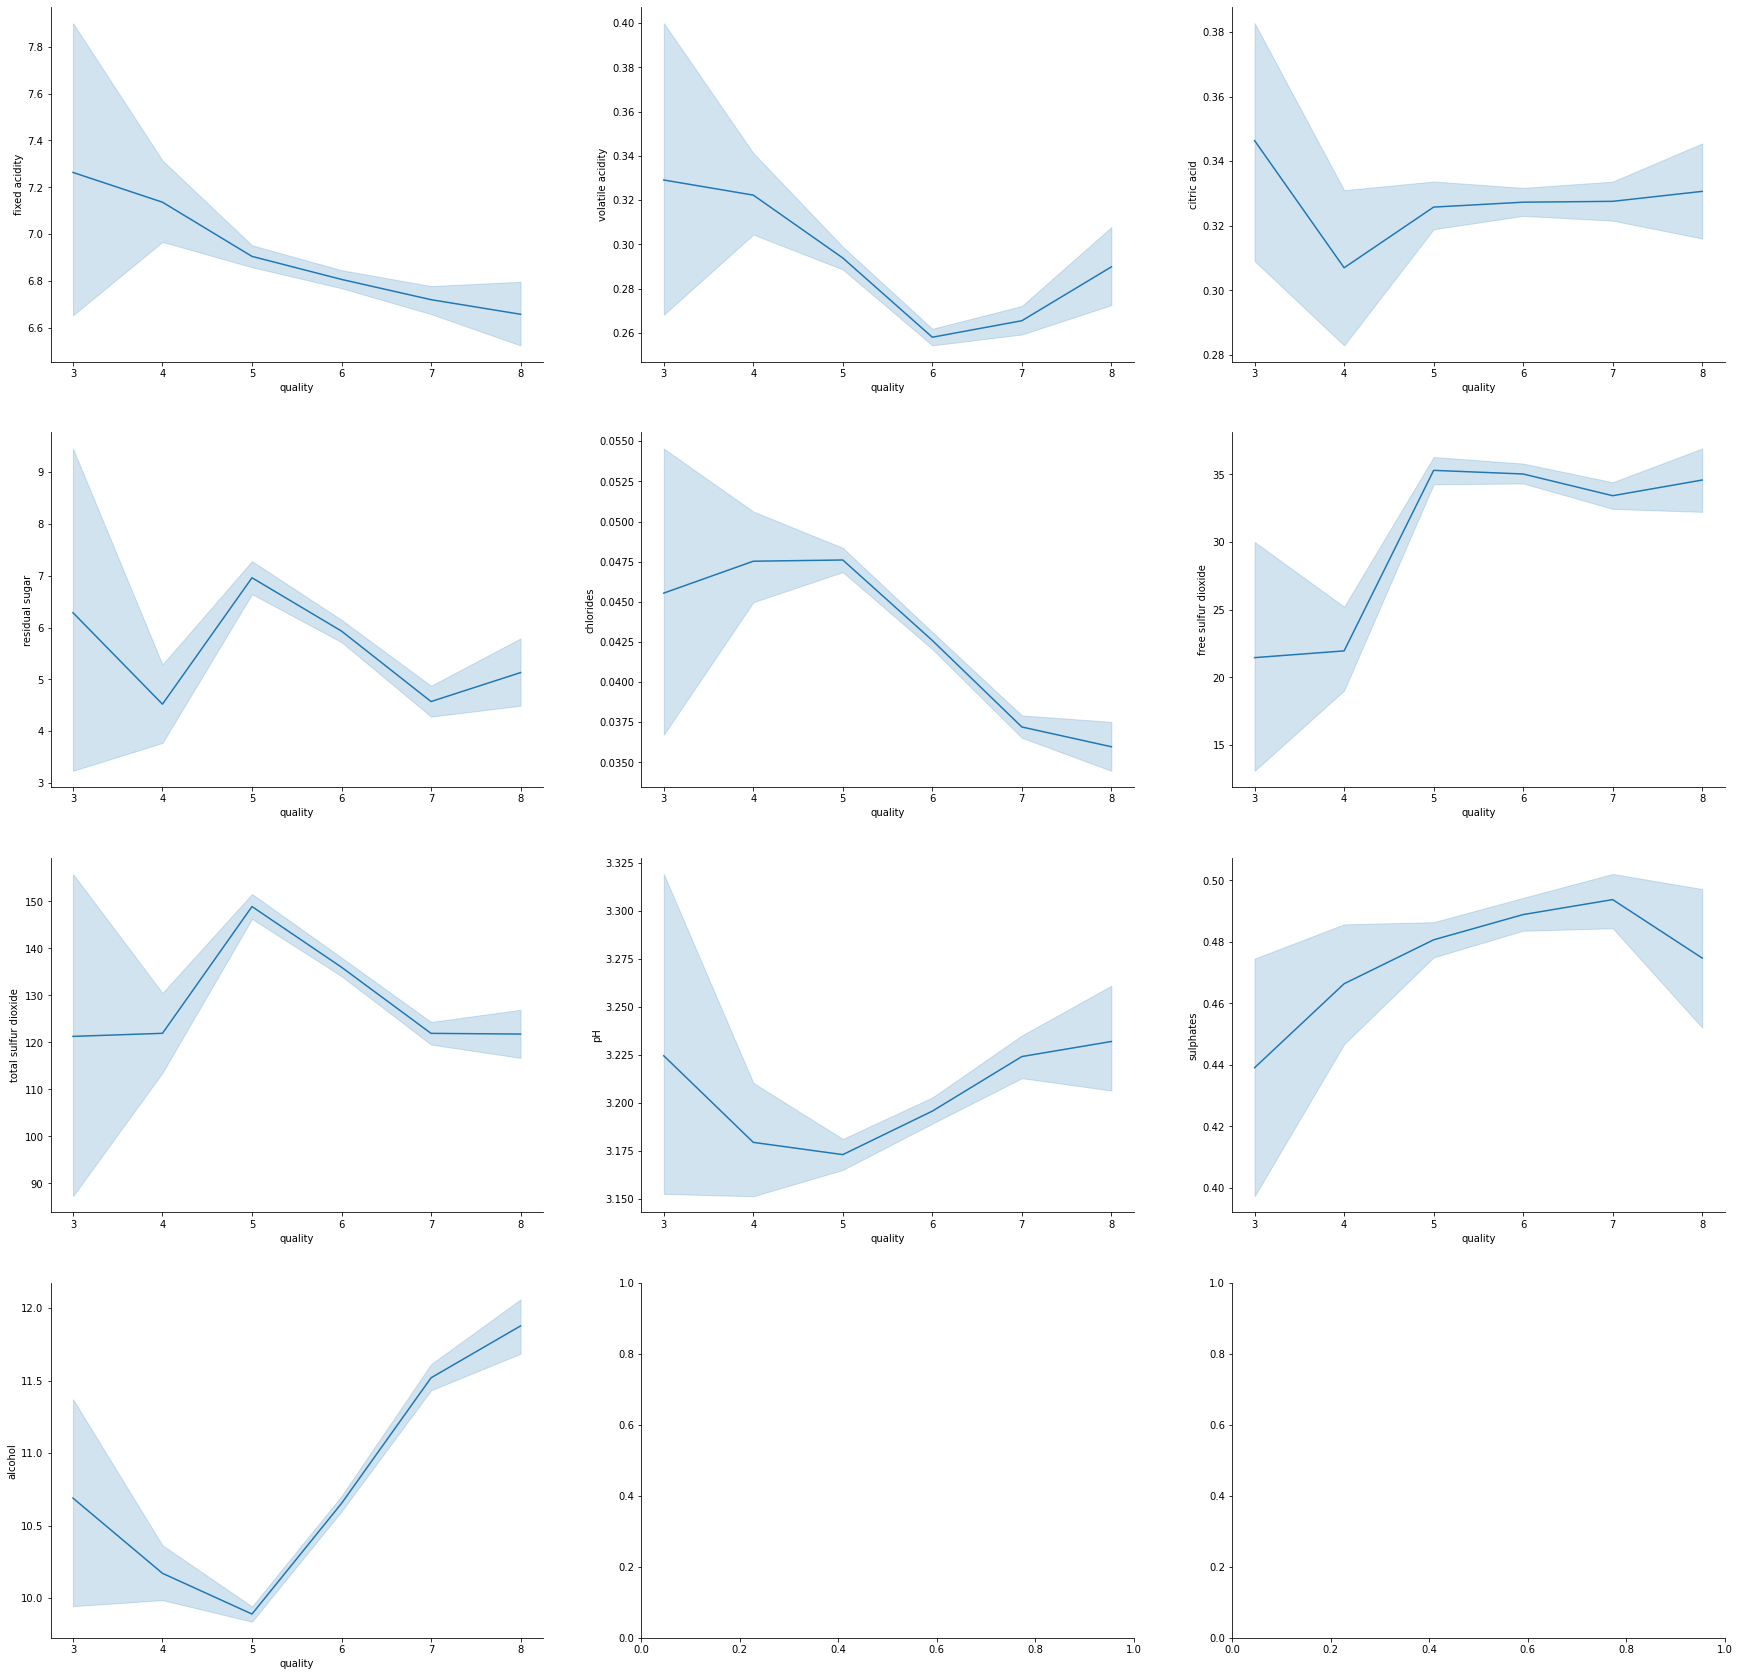

In [18]:
# Set up the matplotlib figure
# This portion of the code should be ideally refactored to facilitate reproducability
subplot_col = 3 # no of cols
subplot_row = 4 # no of rows
f, axes = plt.subplots (subplot_row, subplot_col, figsize = (30,30) )
sns.despine() #removing the top and left borders of each subplot

#Plotting
col_no = 0 #starting index at 1 (instead of 0) to avoid the first column (i.e work (boolean))
for i in range(subplot_row):
  for j in range(subplot_col):
    # Note: df[all_features[col_no]] calls a single column
    # Note: all_features[col_no]  returns the name/label of a column as an argument to data_dict 
    ax = sns.lineplot(x = 'quality', y = all_features[col_no], data = df, ax = axes [i,j] ) 
    col_no += 1
    if col_no == len(all_features):
        break

# Select your predictor features and your target variable.
1. Keep only the features that have a linear relationship.  Store them as a list called `selected_features`
2. Define your `X` and `y` variables
3. Split our data into a training set and a testing set.

In [57]:
# 1. Keep only the features that have a linear relationship.  Store them as a list called `selected_features`
selected_features = ['fixed acidity', 'sulphates', 'free sulfur dioxide', 'chlorides']              

In [58]:
# Define your X and y variables
X = df[selected_features]
# 
y = df['quality']

In [59]:
# 3. Split our data into a training set and a testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23)

___
# STEP 3 (b): Build and train our model
1. Initialize our Linear Regression model.
2. Use our training data to fit aka train our model.


In [60]:
# 1. Initialize our Linear Regression model.
model = LinearRegression()

In [61]:
# 2. Use our training data to fit aka train our model.
model.fit(X,y)

LinearRegression()

___
# STEP 4 (e): Evaluate model.
1. Make new predicitions using our testing data.
2. Calculate R-Squared and Mean Absolute Error socres

In [62]:
# 1. Make new predicitions using our testing data.
y_pred = model.predict(X_test)

# Now lets see how well the model explains the data by finding the R-Squared.
* You can think of r-squared as a goodness of fit measure for the model. 
* How well the trendline explains the variance of the data. 
* R-squared measure the strength of the relationship between your model and the dependent variable on a 0-100% scale.
* Remember for human labeled data like the quality of wine, .3 is pretty good.

In [63]:
# 2. Calculate R-Squared and Mean Absolute Error socres

r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

# USE SKLEARN'S MEAN_ABSOLUTE_ERROR FUNCTION TO SCORE OUR PREDICTIONS VS OUR ACTUAL
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

R-Squared Score: 0.10595681200285678
Mean Absolute Error: 0.6192539800911351


# Saving and exporting our model for future use.
* Use the library pickle to export the pickle

In [ ]:
import pickle

# NAME YOUR MODEL 
filename = 'white-wine-model.pkl'

# EXPORT AND SAVE YOUR MODEL USING YOUR FILENAME
pickle.dump(model, open(filename, 'wb'))
open()

___
# Random Forest Regression

Without step by step guidance, in the cell below, build a Random Forest Regression model and compare the r-squared and mean absolute error scores to the Linear Regression model.
* Dont forget, Random Forest can handle non-linear features!

* When splitting your data, make sure to use the same random state as you did for your Linear Regression model
    * `train_test_split(???, random_state=1)`

* Dont forget about `GridSearchCV` from our last lecture :) 

1. Which model proved to have better scores.
2. Why do you think that is...?


In [46]:
# Do complete Random Forest Regression model here...

target = 'quality'
features = df.columns.to_list()
features.remove(target)


y = df[target].values
X = df[features].values

In [49]:
# Initialize the Random Forest Regressor model
model = RandomForestRegressor(random_state = 23)

# Split the data to test - train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 23 )

# Fit the model with training data
model.fit(X_train, y_train)

# Make predictions and assign it to y_pred
y_pred = model.predict(X_test)

In [50]:
# Calculate scores

r_squared = metrics.r2_score(y_test, y_pred)
print('R-Squared Score:', r_squared)

# USE SKLEARN'S MEAN_ABSOLUTE_ERROR FUNCTION TO SCORE OUR PREDICTIONS VS OUR ACTUAL
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


R-Squared Score: 0.31065251889168777
Mean Absolute Error: 0.551542699724518


In [51]:
# 1. Which model proved to have better scores.

print('Random Forest Regressor')

Random Forest Regressor


In [57]:
# 2. Why do you think that is...?

print('Random Forest can handle non-linear features')
print('which allowed the algo to make use of more data/info to make the prediction')

Random Forest can handle non-linear features
which allowed the algo to make use of more data/info to make the prediction
